I'm going to compare the NNs vs Peak Counts my making a peak counts emulator. This is where I'll try loading them up and making the training data and seeing what they look like. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np 
from GPy.models import GPKroneckerGaussianRegression
from GPy.kern import *
import h5py

 /home/users/swmclau2/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


In [3]:
training_filename = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5'
test_filename = '/home/users/swmclau2/oak/Uatu/UatuFastPMTest/UatuFastPMTest.hdf5'

In [4]:
training_pc = np.load('training_pc.npy')
training_err = np.load('training_err.npy')

In [5]:
test_pc = np.load('test_pc.npy')
test_err = np.load('test_err.npy')

In [6]:
training_pc.shape

(200, 40)

In [7]:
thresholds = np.linspace(-0.01, 0.04,  41)
nu = ((thresholds[1:]+thresholds[:-1])/2.0).reshape((-1,1))

In [8]:
train_cosmos = np.zeros((training_pc.shape[0], 2))
test_cosmos = np.zeros((test_pc.shape[0], 2))

In [9]:
with h5py.File(training_filename, 'r') as f:
    for i, key in enumerate(f.keys()):
        train_cosmos[i] = f[key]['Y'][0].squeeze()

In [10]:
with h5py.File(test_filename, 'r') as f:
    for i, key in enumerate(f.keys()):
        test_cosmos[i] = f[key]['Y'][0].squeeze()

In [11]:
kern1 = RBF(2, ARD=True)
kern2 = RBF(1, ARD=True)

In [12]:
train_cosmos.shape, training_pc.shape, nu.shape

((200, 2), (200, 40), (40, 1))

In [13]:
gp = GPKroneckerGaussianRegression(train_cosmos, nu, np.log10(training_pc), kern1, kern2)#, Yerr=np.log10(training_err))

In [14]:
gp.optimize_restarts(num_restarts=5, verbose = True);

Optimization restart 1/5, f = -13215.831892
Optimization restart 2/5, f = -13215.8318919
Optimization restart 3/5, f = -13215.8318717
Optimization restart 4/5, f = -13215.8317816
Optimization restart 5/5, f = -13215.8318901


In [29]:
pred_pc = 10**gp.predict(test_cosmos, nu, mean_only=True)[0]

In [32]:
pred_pc = 10**pred_pc.reshape(test_pc.shape, order = 'F')
#pred_err = 10**pred_err.reshape(test_pc.shape, order ='F')

In [17]:
acc = np.abs(pred_pc-test_pc)/test_pc

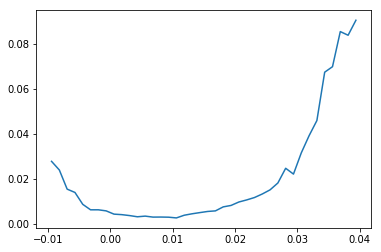

In [18]:
plt.plot(nu.squeeze(), acc.mean(axis=0))

In [ ]:
# geenrate mock sample 
mock_idx = 24 
with h5py.File(test_filename, 'r') as f:
    test_maps 